In [1]:
import pyemu
import flopy as fp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

flopy is installed in C:\Users\schorppl\AppData\Local\Continuum\anaconda3\lib\site-packages\flopy


In [2]:
t_d ="master_glm"
case="mf6_test_1"
pst = pyemu.Pst(os.path.join(t_d,"mf6_test_1.pst"))
pst.write_par_summary_table(filename="none")

,type,transform,count,initial value,upper bound,lower bound,standard deviation
kp_inst:0,kp_inst:0,log,16,0,1,-1,0.5


In [3]:
pst.control_data.noptmax = 3
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 3
pst.pestpp_options["glm_num_reals"] = 50 # this is how many ies uses
pst.pestpp_options["parcov"] = "mf6_test_1.prior.cov"
pst.pestpp_options["base_jacobian"] = "mf6_test_1.jcb"
pst.write(os.path.join(t_d,"mf6_test_1.pst"))

noptmax:3, npar_adj:16, nnz_obs:64


In [4]:
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../pestpp-glm","mf6_test_1.pst",num_workers=6,worker_root=".",
                           master_dir=m_d)

In [5]:
pst_a = pyemu.Pst(os.path.join(m_d,"mf6_test_1.pst"))

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

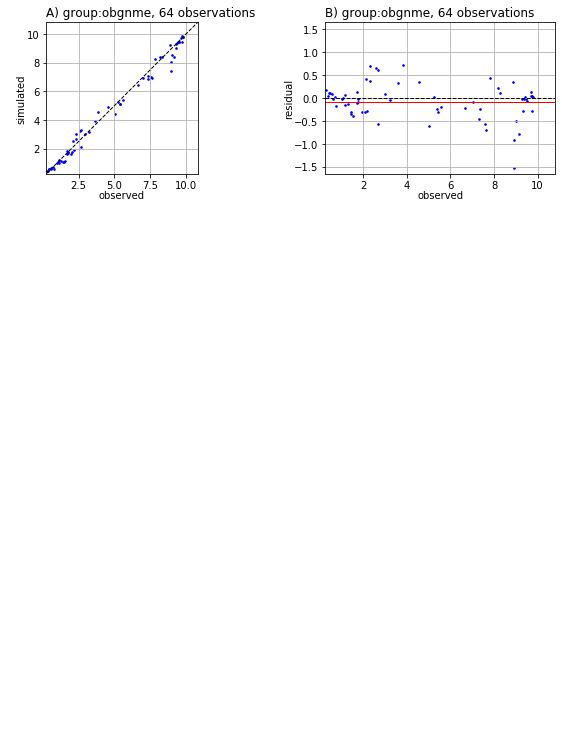

In [6]:
pst_a.plot(kind='1to1')

In [9]:
df = df=pd.read_csv(os.path.join(m_d,"{}.post.obsen.csv".format(case)),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)

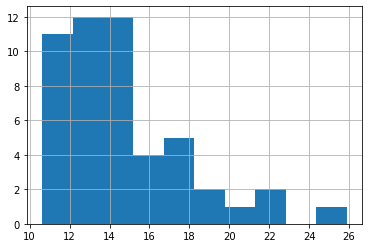

In [10]:
ax = oe.phi_vector.hist()

In [11]:
dfp = df=pd.read_csv(os.path.join(m_d,"{}.par.usum.csv".format(case)),index_col=0)
10**dfp["post_mean"]

name
KP_INST:0_I:1_J:1     5.258053
KP_INST:0_I:1_J:3     0.356162
KP_INST:0_I:1_J:5     0.100000
KP_INST:0_I:1_J:7     0.282257
KP_INST:0_I:3_J:1    10.000000
KP_INST:0_I:3_J:3     0.132595
KP_INST:0_I:3_J:5     1.095080
KP_INST:0_I:3_J:7    10.000000
KP_INST:0_I:5_J:1     0.100000
KP_INST:0_I:5_J:3     0.100000
KP_INST:0_I:5_J:5     0.100000
KP_INST:0_I:5_J:7     0.100000
KP_INST:0_I:7_J:1     0.826011
KP_INST:0_I:7_J:3     0.230250
KP_INST:0_I:7_J:5     0.132625
KP_INST:0_I:7_J:7     1.997763
Name: post_mean, dtype: float64

In [14]:
pst.parameter_data.parval1 = 10**dfp["post_mean"].values
pst.control_data.noptmax = 0 # one run

In [15]:
pst.write(os.path.join(t_d,"{}.pst".format(case)))

pyemu.os_utils.run("..\pestpp-glm.exe {}".format(case),cwd=t_d)

noptmax:0, npar_adj:16, nnz_obs:64


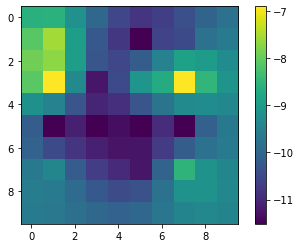

In [16]:
# inversion
plt.imshow(np.log(np.loadtxt(os.path.join(t_d,"k.txt"))))
plt.colorbar()

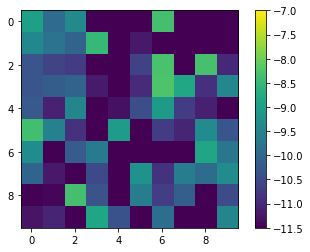

In [17]:
# reality
plt.imshow(np.log(np.loadtxt(os.path.join("workspace","k.txt")).reshape(10,10)),vmin=-11.5,vmax=-7)
plt.colorbar()